Ideas:


*   Confuse the ANN models
    * Confuse only one model
    * Confuse more models and see which does better
    * Confuse using rotation/blurry/modification/etc.
*   Create output of accuracy on each layer in order to see how it improves/downgrades



# ANN Project - CIFAR-10 Dataset

## What does CIFAR-10 dataset contains?

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
The dataset is cached within the tensorflow Python package and has the following classes:
1. airplane
2. automobile
3. bird
4. cat
5. deer
6. dog
7. frog
8. horse
9. ship
10. truck

More information about this dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html)

Now, let's go to the coding process

### Import libraries

In [15]:
from random import randint

import numpy as np
from keras import models, datasets, layers
import tensorflow as tf
tf.config.list_physical_devices('GPU')

import matplotlib.pyplot as plt

### Loading data

In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Show data in pictures

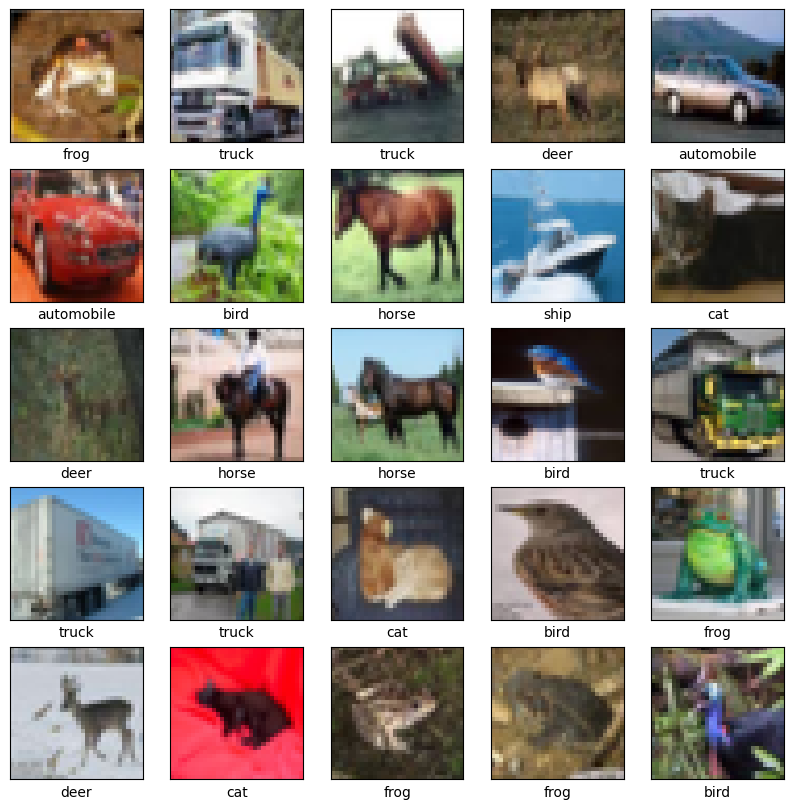

In [8]:
height, width, channels = 32, 32, 3
nb_classes = 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Part I - Construct & Train models

### Create CNN

In [4]:
model_simple = models.Sequential()
model_simple.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_simple.add(layers.MaxPooling2D((2, 2)))
model_simple.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_simple.add(layers.MaxPooling2D((2, 2)))
model_simple.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [5]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
Total params: 93,248
Trainable params: 93,248
Non-traina

In [6]:
model_simple.add(layers.Flatten())
model_simple.add(layers.Dense(64, activation='relu'))
model_simple.add(layers.Dense(10))

In [7]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [8]:
model_simple.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_simple.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 44s 27ms/step - loss: 1.4724 - accuracy: 0.4660 - val_loss: 1.2150 - val_accuracy: 0.5686
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0937 - accuracy: 0.6122 - val_loss: 0.9794 - val_accuracy: 0.6542
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9329 - accuracy: 0.6739 - val_loss: 0.9576 - val_accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8243 - accuracy: 0.7125 - val_loss: 0.8895 - val_accuracy: 0.6874
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7448 - accuracy: 0.7402 - val_loss: 0.8520 - val_accuracy: 0.7037
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6766 - accuracy: 0.7631 - val_loss: 0.8837 - val_accuracy: 0.7041
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6195 - accuracy: 0.7827 - val_loss: 0.8571 -

313/313 - 2s - loss: 0.9312 - accuracy: 0.7060 - 2s/epoch - 6ms/step


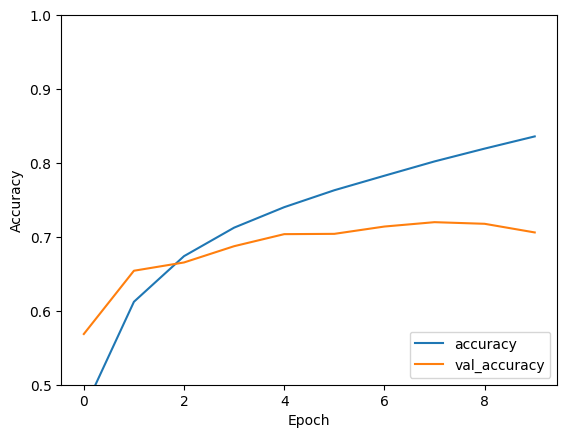

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_simple.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(f"Accuracy score: {test_acc}")

0.7059999704360962


### Create AlexNet

In [16]:
# Create AlexNet model
model_alex = tf.keras.Sequential()

# Layer 1
model_alex.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(32, 32, 3)))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 2
model_alex.add(layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 3
model_alex.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 4
model_alex.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

# Layer 5
model_alex.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model_alex.add(layers.BatchNormalization())
model_alex.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Flatten
model_alex.add(layers.Flatten())

# Layer 6
model_alex.add(layers.Dense(4096, activation='relu'))
model_alex.add(layers.Dropout(0.5))

# Layer 7
model_alex.add(layers.Dense(4096, activation='relu'))
model_alex.add(layers.Dropout(0.5))

# Output layer
model_alex.add(layers.Dense(nb_classes, activation='softmax'))

In [21]:
model_alex.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']
)
model_alex.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 6, 6, 96)          34944     
                                                                 
 batch_normalization_6 (Batc  (None, 6, 6, 96)         384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 96)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 256)         614656    
                                                                 
 batch_normalization_7 (Batc  (None, 3, 3, 256)        1024      
 hNormalization)                                                 
                                                      

In [22]:
history_alex=model_alex.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 536s 341ms/step - loss: 1.6538 - accuracy: 0.3952 - val_loss: 1.8552 - val_accuracy: 0.3218
Epoch 2/10
1563/1563 [==============================] - 507s 325ms/step - loss: 1.4691 - accuracy: 0.4710 - val_loss: 1.5178 - val_accuracy: 0.4601
Epoch 3/10
1563/1563 [==============================] - 382s 244ms/step - loss: 1.3638 - accuracy: 0.5143 - val_loss: 1.6721 - val_accuracy: 0.4293
Epoch 4/10
1563/1563 [==============================] - 392s 251ms/step - loss: 1.2788 - accuracy: 0.5463 - val_loss: 1.3878 - val_accuracy: 0.5160
Epoch 5/10
1563/1563 [==============================] - 437s 279ms/step - loss: 1.1982 - accuracy: 0.5757 - val_loss: 1.2925 - val_accuracy: 0.5451
Epoch 6/10
1563/1563 [==============================] - 440s 281ms/step - loss: 1.1291 - accuracy: 0.6009 - val_loss: 1.2288 - val_accuracy: 0.5673
Epoch 7/10
1563/1563 [==============================] - 448s 287ms/step - loss: 1.0630 - accuracy: 0.6246 - val_

In [23]:
%store history_alex

Stored 'history_alex' (History)


313/313 - 7s - loss: 1.3776 - accuracy: 0.5320 - 7s/epoch - 22ms/step


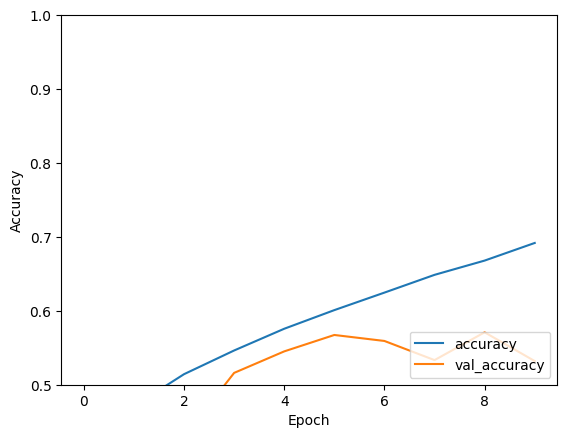

In [26]:
plt.plot(history_alex.history['accuracy'], label='accuracy')
plt.plot(history_alex.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss_alex, test_acc_alex = model_alex.evaluate(test_images,  test_labels, verbose=2)

In [27]:
print(f"Accuracy Score: {test_acc_alex}")

Accuracy Score: 0.5320000052452087


## Part II - Create Adversarial Model

### Fast Gradient Signed Method (FGSM) attack

In [42]:
# Function to calculate adversary noise
def generate_adversary(image, label, model):
  image = tf.cast(image, tf.float32)

  with tf.GradientTape() as tape:
    tape.watch(image)
    prediction = model(image)
    loss = tf.keras.losses.MSE(label, prediction)
  gradient = tape.gradient(loss, image)
  sign_grad = tf.sign(gradient)

  return sign_grad

In [40]:
# Selecting random image for testing
rand_idx = randint(0,49999)
image = train_images[rand_idx].reshape((1, height, width, channels))
label = train_labels[rand_idx]

print(f'Prediction from CNN: {class_names[np.where(label==1)[0][0]]}')
plt.figure(figsize=(3,3))
plt.imshow(image.reshape((height, width, channels)))
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [43]:
# Adding the adversary noise to image
perturbations = generate_adversary(image,label, model_alex).numpy()
adversarial = image + (perturbations * 0.05)

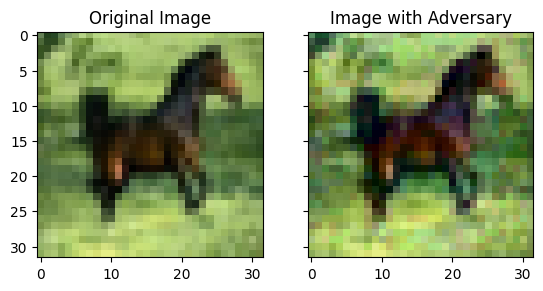

In [44]:
# Comparing both images
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image.reshape(height,width, channels))
ax1.set_title("Original Image")
ax2.imshow(adversarial.reshape(height,width, channels))
ax2.set_title("Image with Adversary")
plt.show()

In [45]:
# Comparing predictions
print(f'Normal Image Prediction: {class_names[model_alex.predict(image).argmax()]}')
print(f"Adversary Prediction: {class_names  [model_alex.predict(adversarial).argmax()]}")

1/1 [==============================] - 0s 137ms/step
Normal Image Prediction: horse
1/1 [==============================] - 0s 33ms/step
Adversary Prediction: horse


In [49]:
# Function to generate batch of images with adversary
def adversary_generator(batch_size, model):
  while True:
    images = []
    labels = []
    for batch in range(batch_size):
      N = randint(0, 49999)
      label = train_labels[N]
      image = train_images[N].reshape((1,height, width, channels))

      perturbations = generate_adversary(image, label, model).numpy()
      adversarial = image + (perturbations * 0.1)

      images.append(adversarial)
      labels.append(label)

      if batch%1000 == 0:
        print(f"{batch} images generated")

    images = np.asarray(images).reshape((batch_size, height, width, channels))
    labels = np.asarray(labels)

    yield images, labels

In [50]:
# Testing model accuracy on adversarial examples
x_adversarial, y_adversarial = next(adversary_generator(10000, model_alex))
ad_acc = model_alex.evaluate(x_adversarial, y_adversarial, verbose=0)
print(f"Accuracy on Adversarial Examples: {ad_acc[1]*100}")

0 images generated
1000 images generated
2000 images generated
3000 images generated
4000 images generated
5000 images generated
6000 images generated
7000 images generated
8000 images generated
9000 images generated
Accuracy on Adversarial Examples: 61.94999814033508
